In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

In [2]:
data = pd.read_parquet('C:\\Users\\esma\\Downloads\\yellow_tripdata_2023-01.parquet')

In [3]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
data.shape

(3066766, 19)

In [6]:
data['duration'] = data.tpep_dropoff_datetime -data.tpep_pickup_datetime

In [7]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50


In [8]:
data.dtypes

VendorID                           int64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
airport_fee                      float64
duration                 timedelta64[ns]
dtype: object

In [9]:
data.duration = data.duration.apply(lambda td: td.total_seconds()/60)

In [10]:
data.duration.head()

0     8.433333
1     6.316667
2    12.750000
3     9.616667
4    10.833333
Name: duration, dtype: float64

In [11]:
std = data['duration'].std()
std

42.594351241920904

In [12]:
df = data[(data.duration >= 1)& (data.duration  <= 60)]
df.shape

(3009173, 20)

C:\Users\esma\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


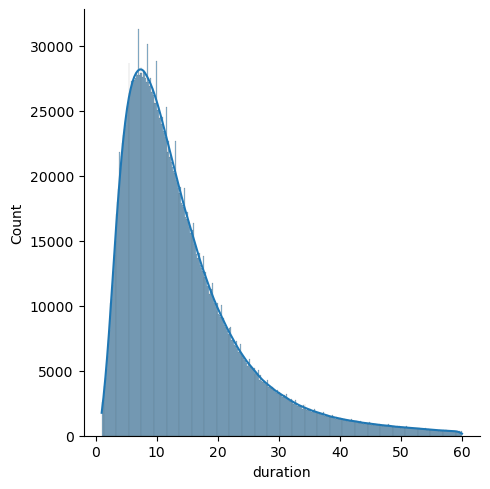

In [13]:
sns.displot(df.duration , kde = True)
plt.show()

In [14]:
len(data.duration)

3066766

In [15]:
len(df.duration)

3009173

In [16]:
fraction_remaining = len(df.duration)/len(data.duration)
fraction_remaining

0.9812202822125979

In [17]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [18]:
df[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [19]:
df[categorical]=df[categorical].astype(str)

C:\Users\esma\AppData\Local\Temp\ipykernel_5348\2220226503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical]=df[categorical].astype(str)


In [20]:
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [21]:
train_dicts = df[categorical+numerical].to_dict(orient='records')

In [22]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [23]:
X_train

<3009173x516 sparse matrix of type '<class 'numpy.float64'>'
	with 9027519 stored elements in Compressed Sparse Row format>

In [24]:
X_train.shape[1]

516

In [25]:
target = 'duration'
y_train =df[target].values

In [26]:
y_train


array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [27]:
lr = LinearRegression ()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_train)
y_pred

array([11.47402265, 10.94671062, 11.36752529, ..., 11.66834426,
       12.70016582, 11.60929473])

In [29]:
rmse = mean_squared_error(y_train,y_pred,squared=False)
print('Rmse is:',rmse)

Rmse is: 7.65839726314459


In [32]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [47]:
df_train = read_dataframe('C:\\Users\\esma\\Downloads\\yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('C:\\Users\\esma\\Downloads\\yellow_tripdata_2023-02.parquet')

In [48]:
len(df_train), len(df_val)

(3009173, 2855951)

In [49]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [50]:
categorical = ['PU_DO'] 
numerical = ['trip_distance']
dv = DictVectorizer()
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [51]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

5.256177130486534